In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from utils.parse_csv import Parser
import matplotlib.pyplot as plt
import seaborn as sns
from metrics.RankEval import RankEval
import pandas as pd

In [96]:
sns.set_style("darkgrid")
sns.set_palette('husl')

In [17]:
parser = Parser()
evaluator = RankEval()

In [71]:
def get_coefs(main_path):
    kendall = [[], []]
    spearman = [[], []]
    hamming = [[], []]
    for i in range(20):
        f_path = f'{main_path}/run{i+1}.csv'
        try:
            r1, r2 = parser.parse_rankings(f_path)
        except:
            print(f'error at: {f_path}')
        # r1, r2 = parser.parse_rankings(f_path)
        kendall[0].append(evaluator.aggregate(r1, 'kendall'))
        kendall[1].append(evaluator.aggregate(r2, 'kendall'))
        spearman[0].append(evaluator.aggregate(r1, 'spearman'))
        spearman[1].append(evaluator.aggregate(r2, 'spearman'))
        hamming[0].append(evaluator.aggregate(r1, 'hamming'))
        hamming[1].append(evaluator.aggregate(r2, 'hamming'))

    return kendall, spearman, hamming
            

# Data for gpt-3.5-turbo, rank, Anonymized

In [72]:
path = '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-rank-False-20-1.0'

In [73]:
k35tra, s35tra, h35tra = get_coefs(path)

In [91]:
dfk35tra = pd.DataFrame(k35tra).T
dfk35tra.columns = ['Move 1', 'Move 2']
dfs35tra = pd.DataFrame(s35tra).T
dfs35tra.columns = ['Move 1', 'Move 2']
dfh35tra = pd.DataFrame(h35tra).T
dfh35tra.columns = ['Move 1', 'Move 2']

# Data for gpt-3.5-turbo, rank, explicit

In [74]:
path = '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-rank-True-20-1.0'

In [75]:
k35tre, s35tre, h35tre = get_coefs(path)

In [92]:
dfk35tre = pd.DataFrame(k35tre).T
dfk35tre.columns = ['Move 1', 'Move 2']
dfs35tre = pd.DataFrame(s35tre).T
dfs35tre.columns = ['Move 1', 'Move 2']
dfh35tre = pd.DataFrame(h35tre).T
dfh35tre.columns = ['Move 1', 'Move 2']

# Data for gpt-4, rank, explicit

In [76]:
path = '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-False-20-1.0'

In [77]:
k4re, s4re, h4re = get_coefs(path)

error at: /Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-False-20-1.0/run15.csv


In [93]:
dfk4re = pd.DataFrame(k4re).T
dfk4re.columns = ['Move 1', 'Move 2']
dfs4re = pd.DataFrame(s4re).T
dfs4re.columns = ['Move 1', 'Move 2']
dfh4re = pd.DataFrame(h4re).T
dfh4re.columns = ['Move 1', 'Move 2']

# Data for gpt-4, rank, anonymous

In [78]:
path = '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-True-20-1.0'

In [79]:
k4ra, s4ra, h4ra = get_coefs(path)

In [94]:
dfk4ra = pd.DataFrame(k4ra).T
dfk4ra.columns = ['Move 1', 'Move 2']
dfs4ra = pd.DataFrame(s4ra).T
dfs4ra.columns = ['Move 1', 'Move 2']
dfh4ra = pd.DataFrame(h4ra).T
dfh4ra.columns = ['Move 1', 'Move 2']

# Plotting

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

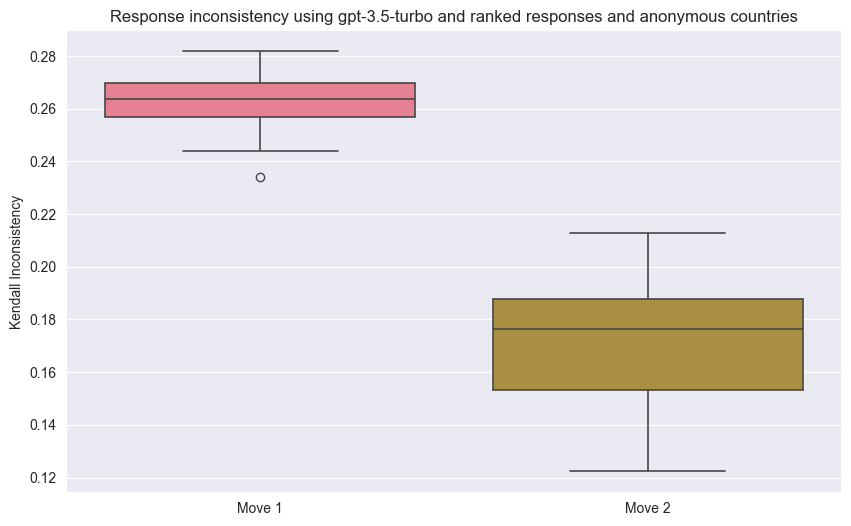

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(dfk35tra, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

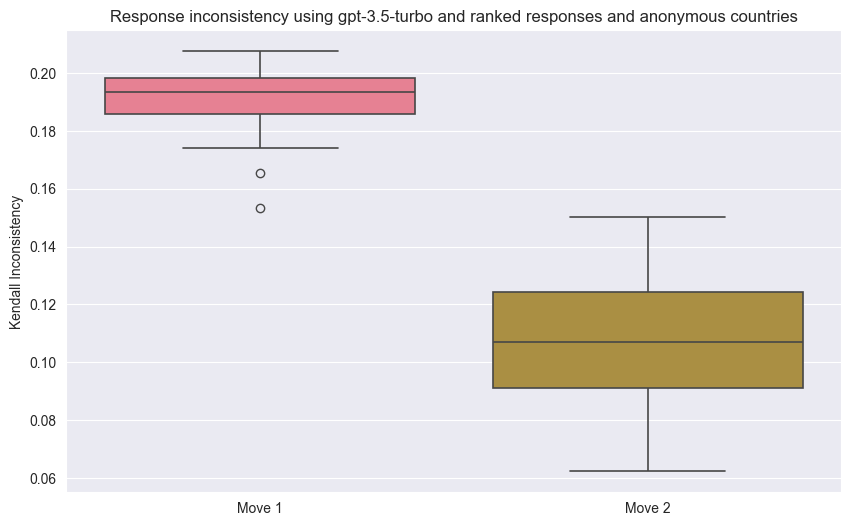

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(dfs35tra, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

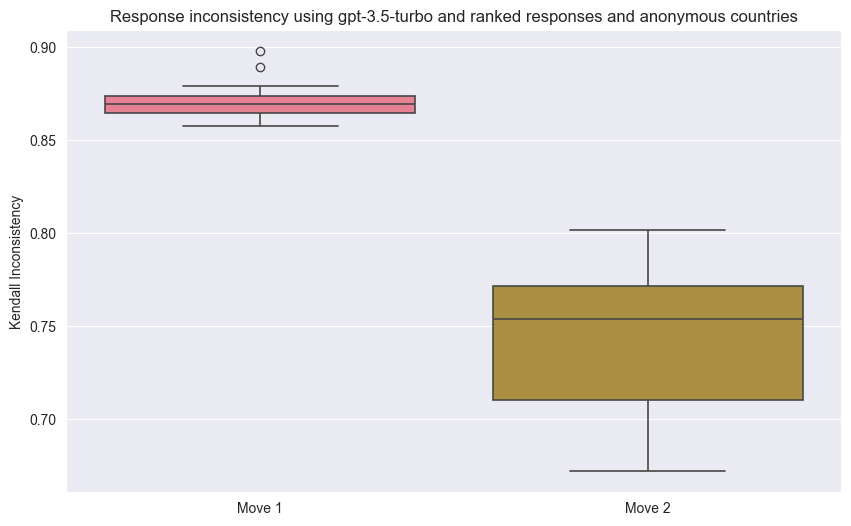

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(dfh35tra, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

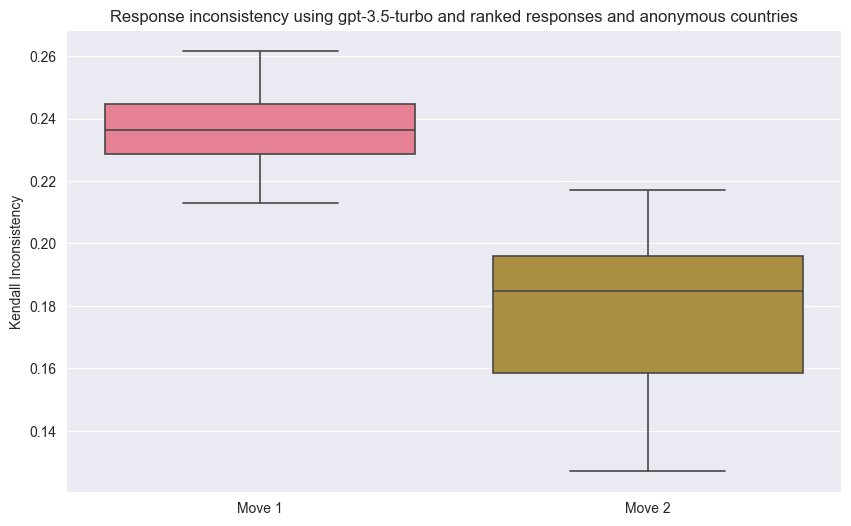

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(dfk35tre, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

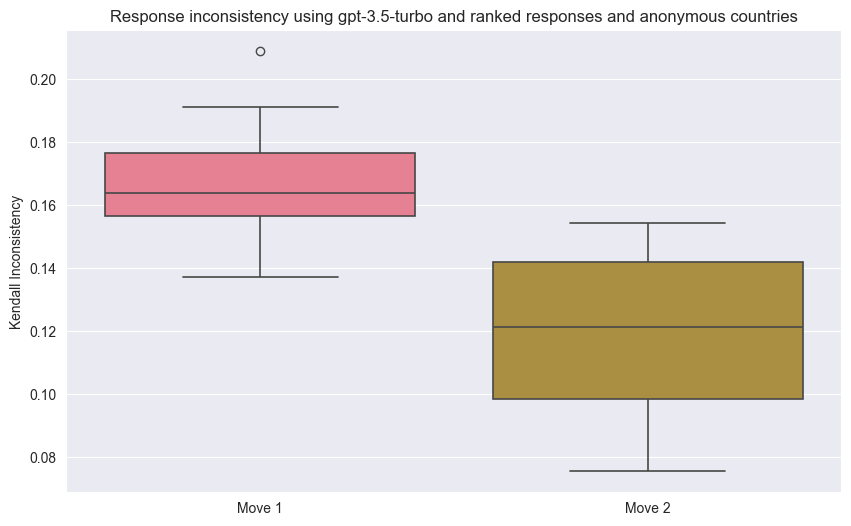

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(dfs35tre, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

Text(0.5, 1.0, 'Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

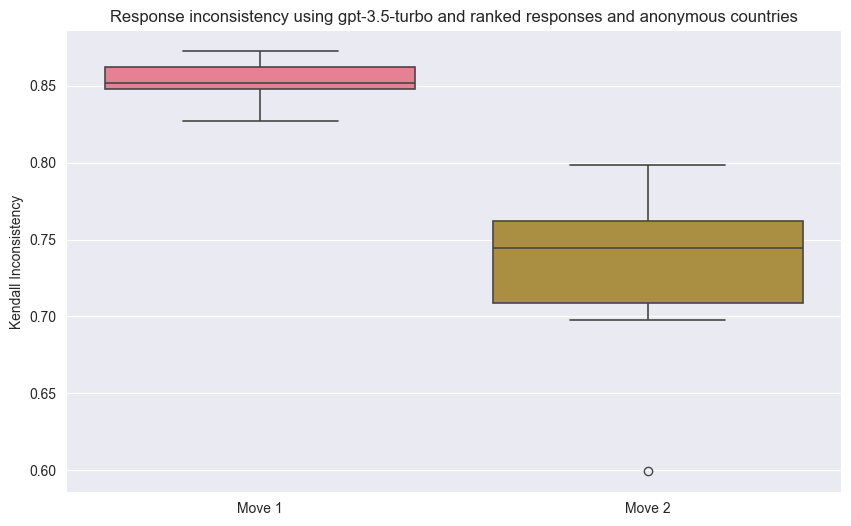

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(dfh35tre, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('Response inconsistency using gpt-3.5-turbo and ranked responses and anonymous countries')

In [112]:
kendalls = pd.concat([dfk35tra['Move 1'], dfk35tra['Move 2'], dfk35tre['Move 1'], dfk35tre['Move 2'], dfk4ra['Move 1'], dfk4ra['Move 2'], dfk4re['Move 1'], dfk4re['Move 2']], axis=1)
col_names = [
    '35ta1',
    '35ta2',
    '35te1',
    '35te2',
    '4a1',
    '4a2',
    '4e1',
    '4e2',
]
kendalls.columns = col_names

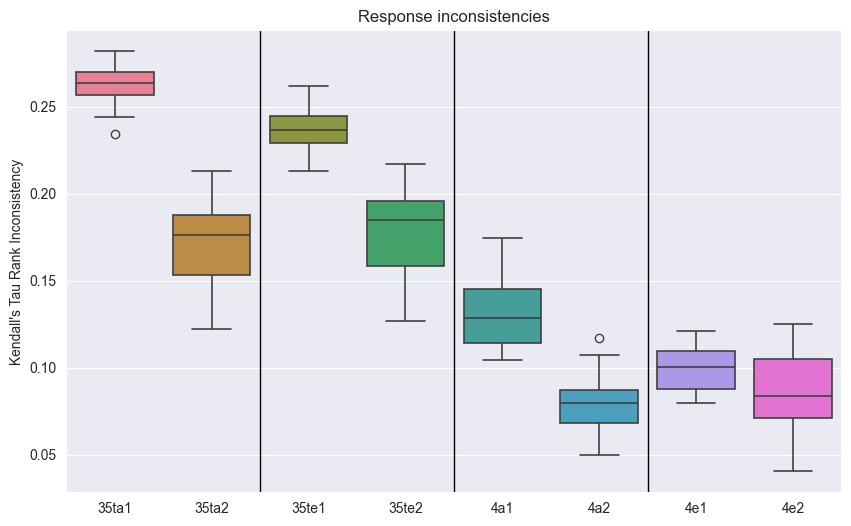

In [142]:
plt.figure(figsize=(10, 6))
sns.boxplot(kendalls, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Rank Inconsistency')
plt.title('Response inconsistencies')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

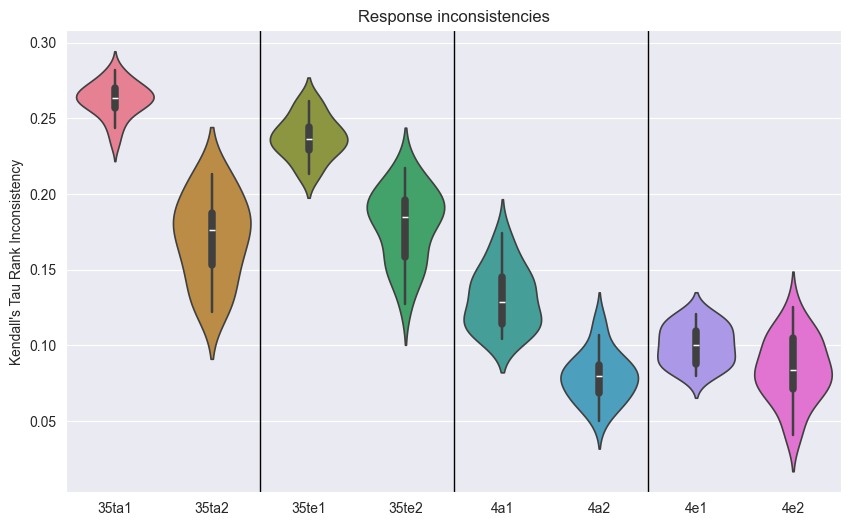

In [143]:
plt.figure(figsize=(10, 6))
sns.violinplot(kendalls, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Rank Inconsistency')
plt.title('Response inconsistencies')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [121]:
spearmans = pd.concat([dfs35tra['Move 1'], dfs35tra['Move 2'], dfs35tre['Move 1'], dfs35tre['Move 2'], dfs4ra['Move 1'], dfs4ra['Move 2'], dfs4re['Move 1'], dfs4re['Move 2']], axis=1)
col_names = [
    '35ta1',
    '35ta2',
    '35te1',
    '35te2',
    '4a1',
    '4a2',
    '4e1',
    '4e2',
]
spearmans.columns = col_names

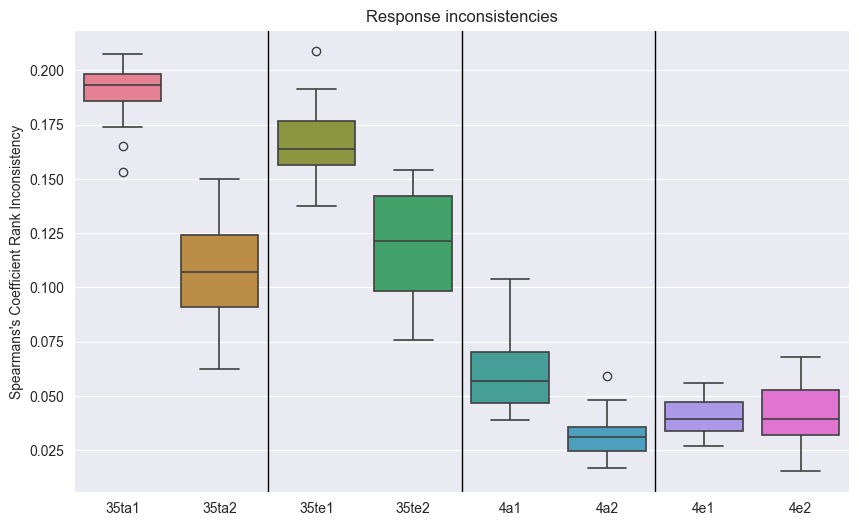

In [141]:
plt.figure(figsize=(10, 6))
sns.boxplot(spearmans, linewidth=1.2)
plt.ylabel('Spearmans\'s Coefficient Rank Inconsistency')
plt.title('Response inconsistencies')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

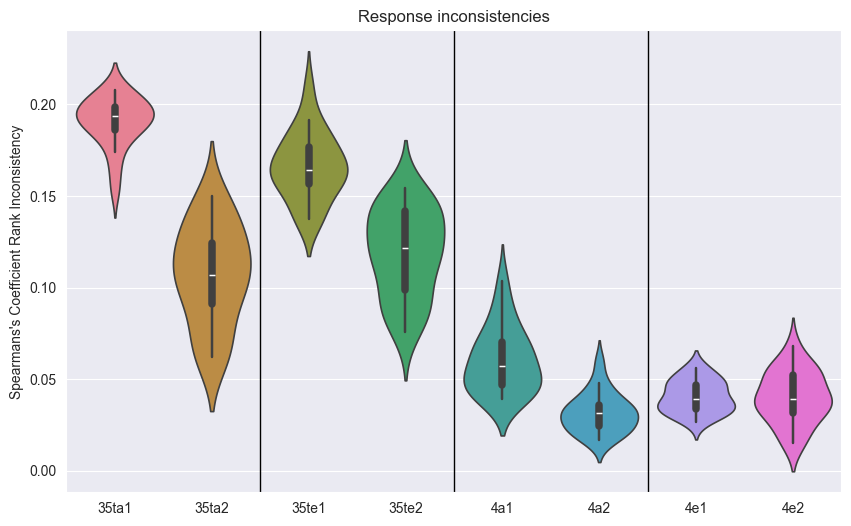

In [140]:
plt.figure(figsize=(10, 6))
sns.violinplot(spearmans, linewidth=1.2)
plt.ylabel('Spearmans\'s Coefficient Rank Inconsistency')
plt.title('Response inconsistencies')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [124]:
hammings = pd.concat([dfh35tra['Move 1'], dfh35tra['Move 2'], dfh35tre['Move 1'], dfh35tre['Move 2'], dfh4ra['Move 1'], dfh4ra['Move 2'], dfh4re['Move 1'], dfh4re['Move 2']], axis=1)
col_names = [
    '35ta1',
    '35ta2',
    '35te1',
    '35te2',
    '4a1',
    '4a2',
    '4e1',
    '4e2',
]
hammings.columns = col_names

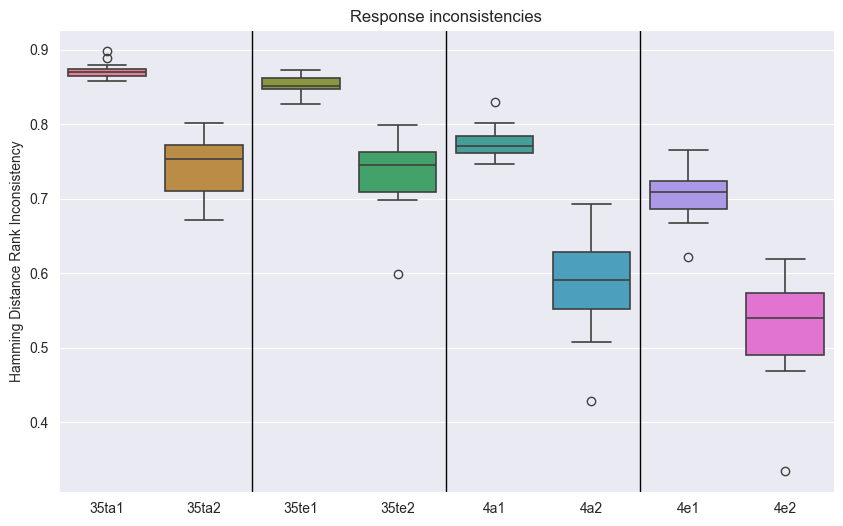

In [138]:
plt.figure(figsize=(10, 6))
sns.boxplot(hammings, linewidth=1.2)
plt.ylabel('Hamming Distance Rank Inconsistency')
plt.title('Response inconsistencies')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

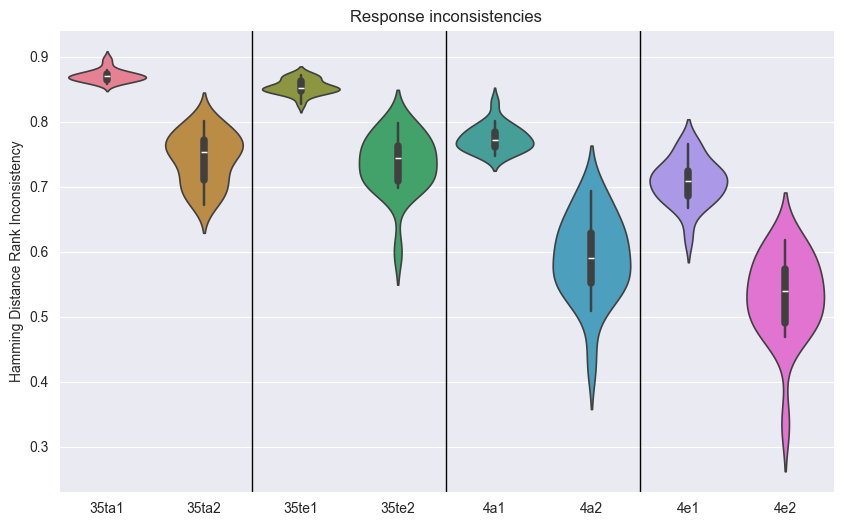

In [139]:
plt.figure(figsize=(10, 6))
sns.violinplot(hammings, linewidth=1.2)
plt.ylabel('Hamming Distance Rank Inconsistency')
plt.title('Response inconsistencies')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)